# Homework 12（12.7）

### 2023级   吕欣萌   10222140402

## 一、**人口统计分析**

In [1]:
#加载数据
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv("C:/Users/86137/Desktop/users_combined_info.csv")

# 查看数据的基本信息
print(df.info())

# 查看数据的前几行
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294776 entries, 0 to 1294775
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1294776 non-null  int64  
 1   name             1294776 non-null  object 
 2   location         1294776 non-null  object 
 3   total_influence  1294776 non-null  float64
 4   country          1206625 non-null  object 
 5   event_type       1294776 non-null  object 
 6   event_action     1294776 non-null  object 
 7   event_time       1294776 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.0+ MB
None
   user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  

In [2]:
#数据清洗
#1.处理缺失值
print(df.isnull().sum())
# 对缺失值进行处理，可以选择删除含有缺失值的行或者填充缺失值
df.dropna(subset=['location', 'country', 'event_time'], inplace=True)

#2.处理异常值
# 影响力不应该为负值，可以过滤掉
df = df[df['total_influence'] >= 0]

user_id                0
name                   0
location               0
total_influence        0
country            88151
event_type             0
event_action           0
event_time             0
dtype: int64


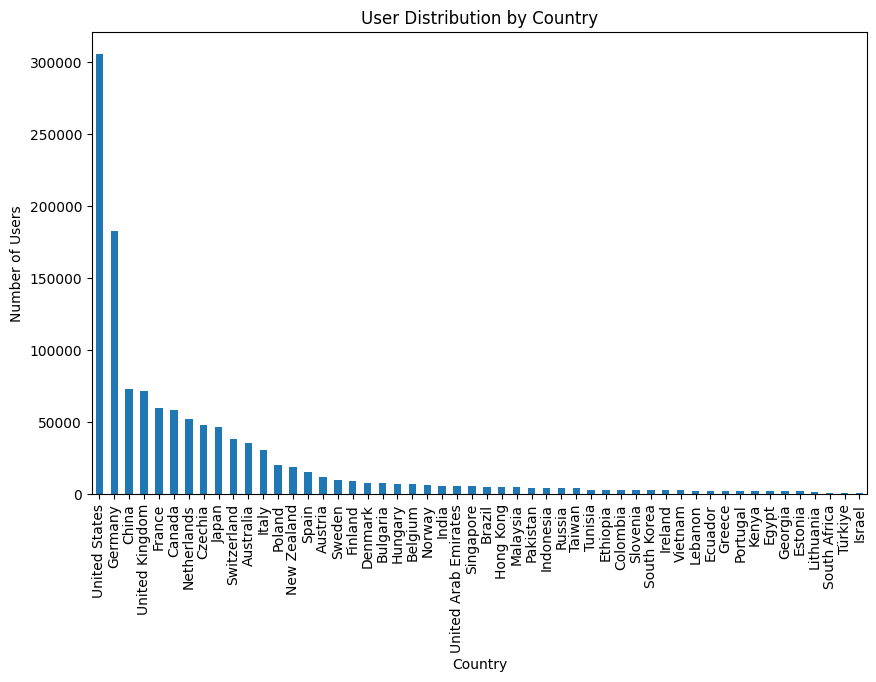

country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Name: count, dtype: int64


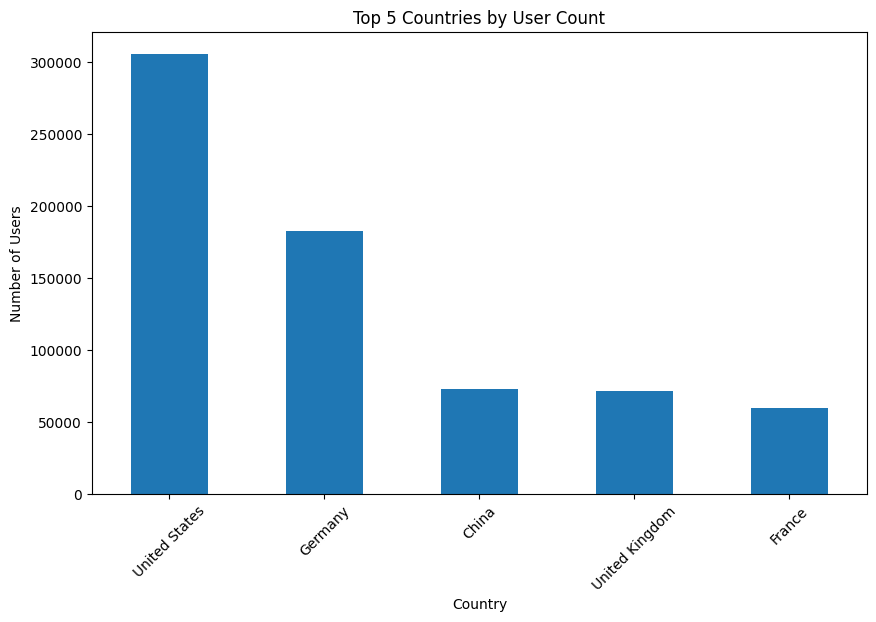

In [8]:
# 1. 国家和地区分布分析
# 统计各个国家的用户数量
country_counts = df['country'].value_counts()

# 绘制柱状图
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

# 输出前五个国家的用户数量
print(country_counts.head(5))

# 绘制前五个国家的柱状图
country_counts.head(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Countries by User Count')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

前五个最多用户的城市:
city_or_country
Palo Alto    19215
Paris        16021
Houston      15449
Edinburgh    15308
Berlin       15095
Name: count, dtype: int64


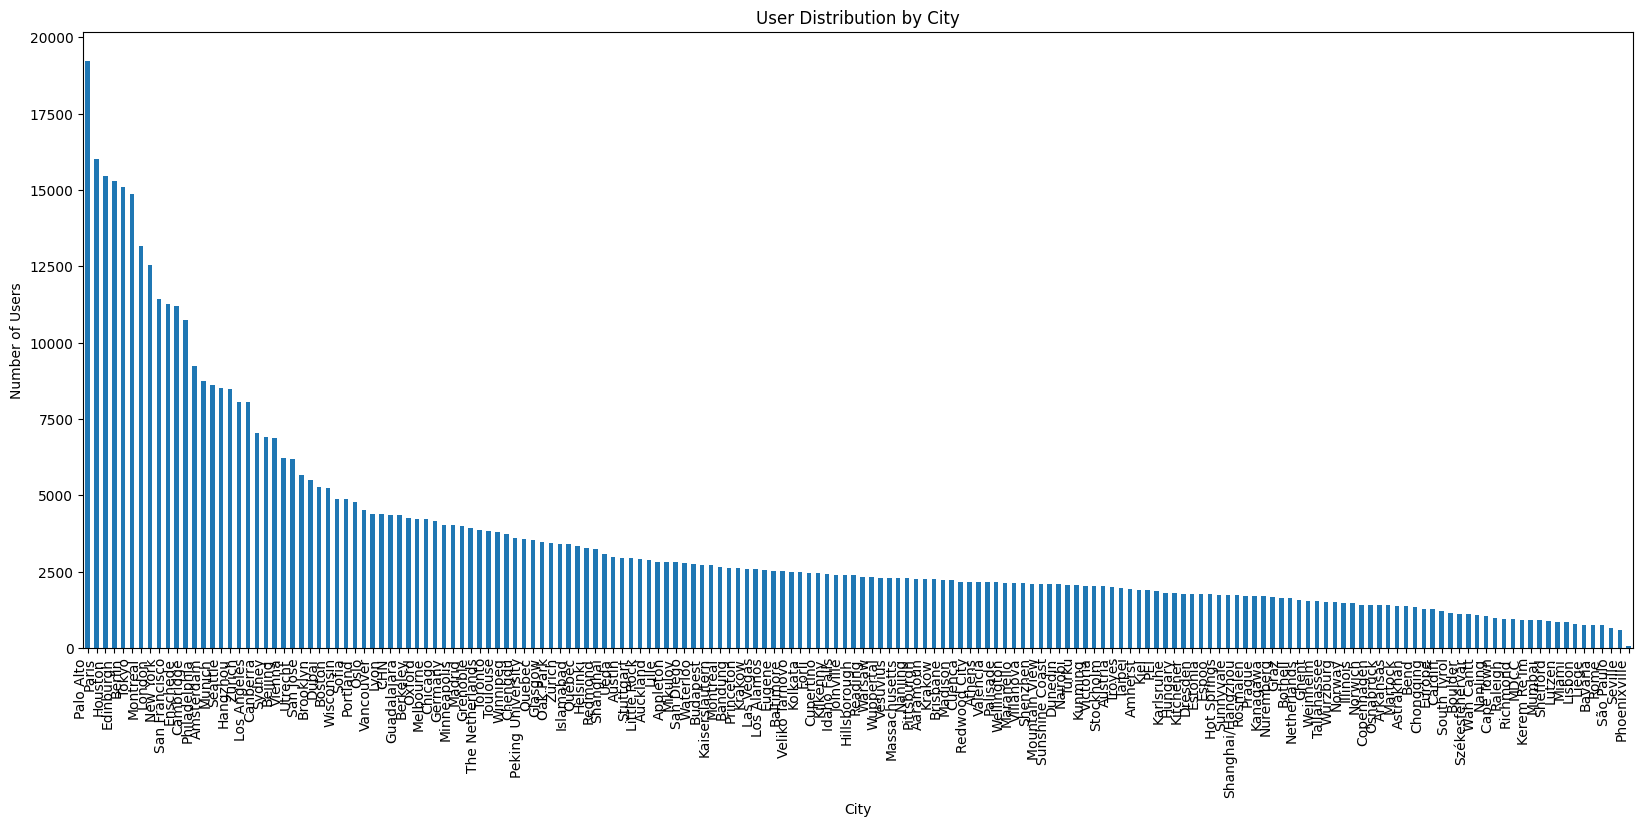

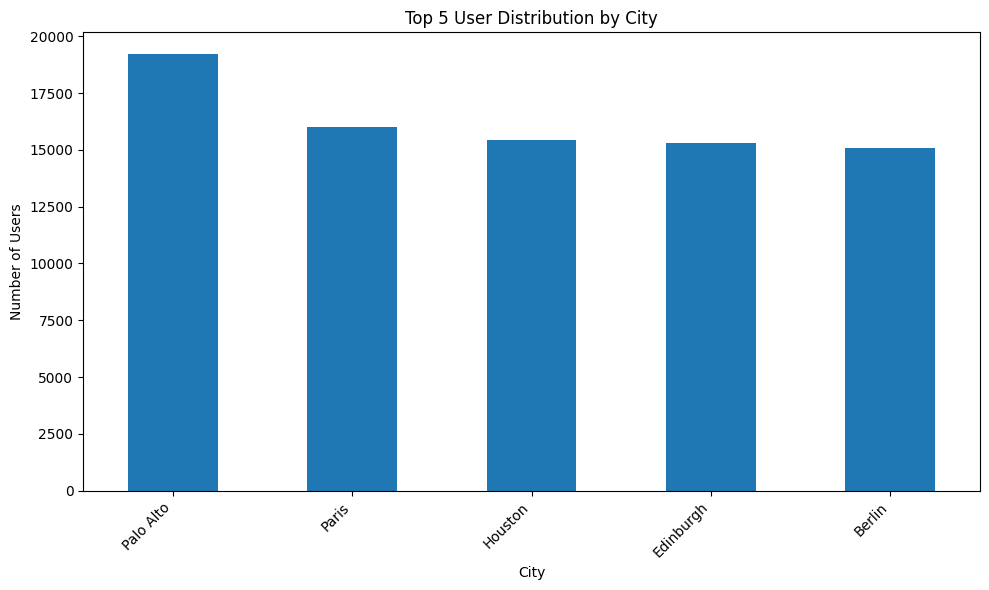

In [4]:
# 2. 城市级别分布分析
# 1. 从 location 列提取城市或国家
def extract_city_or_country(location):
    if isinstance(location, str):
        parts = location.split(',')
        if len(parts) > 1:
            # 如果有城市部分，返回城市名
            return parts[0].strip()  # 去掉多余的空格
    return None  # 如果没有城市部分，返回 None

# 提取城市或国家
df['city_or_country'] = df['location'].apply(extract_city_or_country)

# 2. 去除没有城市的记录
df_filtered = df[df['city_or_country'].notnull()]

# 3. 统计各个城市的用户数量
city_counts = df_filtered['city_or_country'].value_counts()

# 4. 绘制城市分布柱状图
plt.figure(figsize=(20, 8))  # 增加图形宽度
city_counts.plot(kind='bar', figsize=(20, 8))

# 设置标题和标签
plt.title('User Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Users')

# 设置横轴标签旋转角度
plt.xticks(rotation=90, ha='right')  # 45度角旋转，文本右对齐

# 获取前五个最多用户的城市
top_5_cities = city_counts.head(5)

# 输出前五个城市
print("前五个最多用户的城市:")
print(top_5_cities)

# 绘制前五个城市的柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
top_5_cities.plot(kind='bar', figsize=(10, 6))

# 设置标题和标签
plt.title('Top 5 User Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Users')

# 设置横轴标签旋转角度
plt.xticks(rotation=45, ha='right')  # 45度角旋转，文本右对齐

# 显示图形
plt.tight_layout()  # 调整布局，避免标签重叠
plt.show()

timezone
America/New_York    305788
Europe/Berlin       182659
Europe/London        71606
America/Toronto      58600
Australia/Sydney     35746
Asia/Kolkata          5689
Name: count, dtype: int64


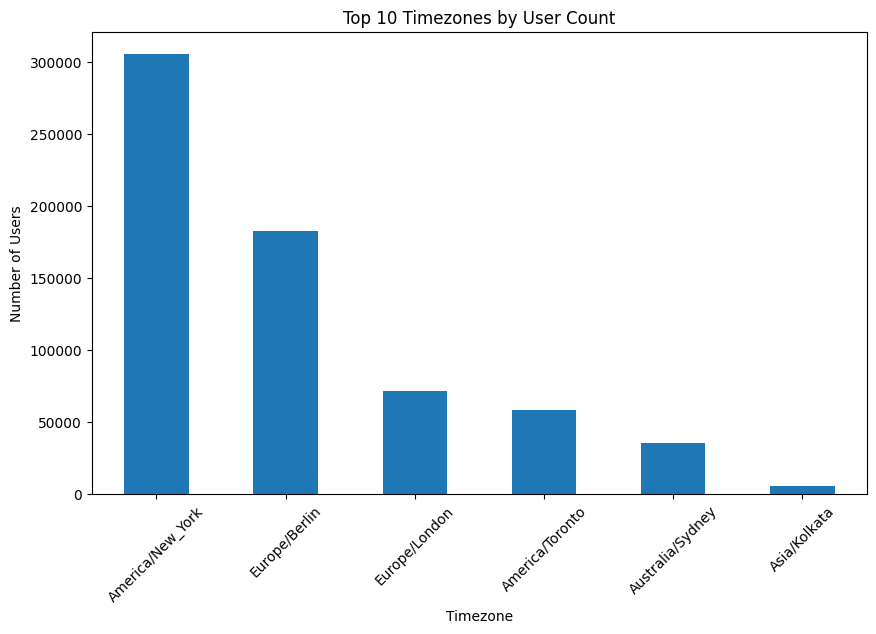

In [5]:
# 3.时区分布
# 使用国家映射到时区
country_to_timezone = {
    'United States': 'America/New_York',
    'Canada': 'America/Toronto',
    'United Kingdom': 'Europe/London',
    'Australia': 'Australia/Sydney',
    'India': 'Asia/Kolkata',
    'Germany': 'Europe/Berlin',
}

# 获取时区
def get_timezone(country):
    return country_to_timezone.get(country, None)

df['timezone'] = df['country'].apply(get_timezone)

# 统计时区分布
timezone_distribution = df['timezone'].value_counts()

# 输出时区分布
print(timezone_distribution.head(10))

# 绘制时区分布图
timezone_distribution.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Timezones by User Count')
plt.xlabel('Timezone')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

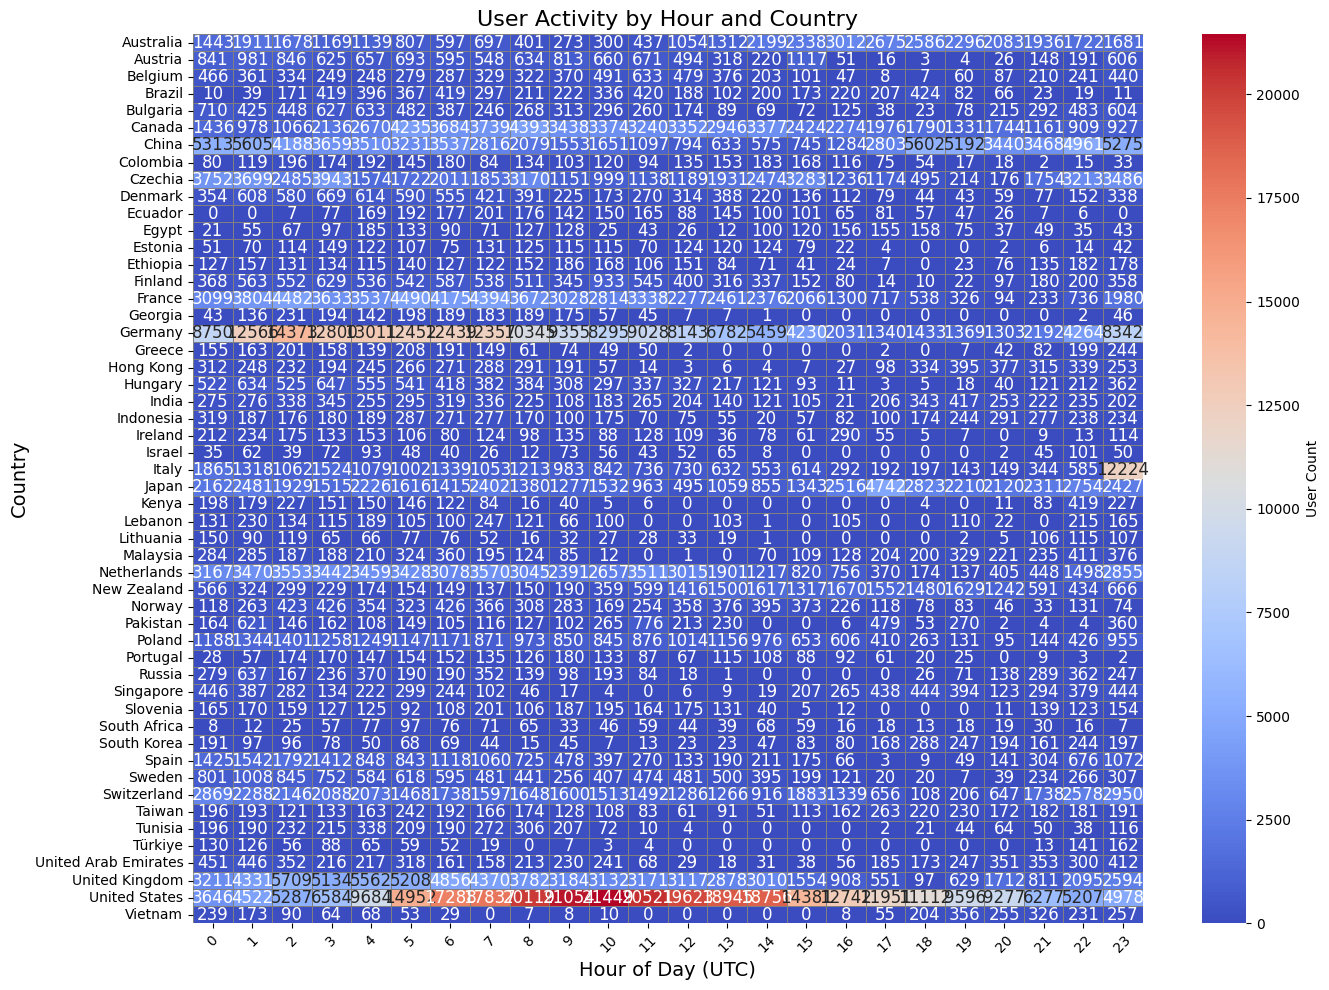

Top 5 countries with the most active users:
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Name: count, dtype: int64


In [10]:
#不同地区用户的协作时间模式
import seaborn as sns
from geopy.geocoders import Nominatim
from timezonefinder import TimezoneFinder
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 将 event_time 列转换为 UTC 时区
df['event_time_utc'] = df['event_time'].dt.tz_convert('UTC')

# 提取活动的小时（UTC）
df['event_hour'] = df['event_time_utc'].dt.hour

# 按国家和小时分组，统计每个国家在不同小时的活跃用户数量
hourly_activity_by_country = df.groupby(['country', 'event_hour']).size().unstack(fill_value=0)

# 绘制热力图
plt.figure(figsize=(14, 10))
sns.heatmap(
    hourly_activity_by_country,
    cmap='coolwarm',  # 改用 'coolwarm' 色图，使高低值对比更加明显
    annot=True,       # 显示数值
    fmt='d',          # 数字格式化为整数
    annot_kws={'size': 12},  # 设置注释的字体大小
    cbar_kws={'label': 'User Count'},  # 设置色条标签
    linewidths=0.5,   # 设置网格线的宽度
    linecolor='gray', # 设置网格线的颜色
    xticklabels=hourly_activity_by_country.columns,  # 设置x轴标签
    yticklabels=hourly_activity_by_country.index  # 设置y轴标签
)
plt.title('User Activity by Hour and Country', fontsize=16)
plt.xlabel('Hour of Day (UTC)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # 优化布局，防止标签重叠
plt.show()

# 输出前五位活跃的国家（基于用户数量）
country_counts = df['country'].value_counts().head(5)
print("Top 5 countries with the most active users:")
print(country_counts)


## 二、协作行为分析

Top 5 most active users based on submission count:
user_id
40306929    11111
43724913     4328
50149701     4033
158862       3963
2119212      2208
dtype: int64
Bottom 5 least active users based on submission count:
user_id
6702118     1
6225961     1
814283      1
62625502    2
1541747     3
dtype: int64
Number of high-active users: 229
Number of low-active users: 231


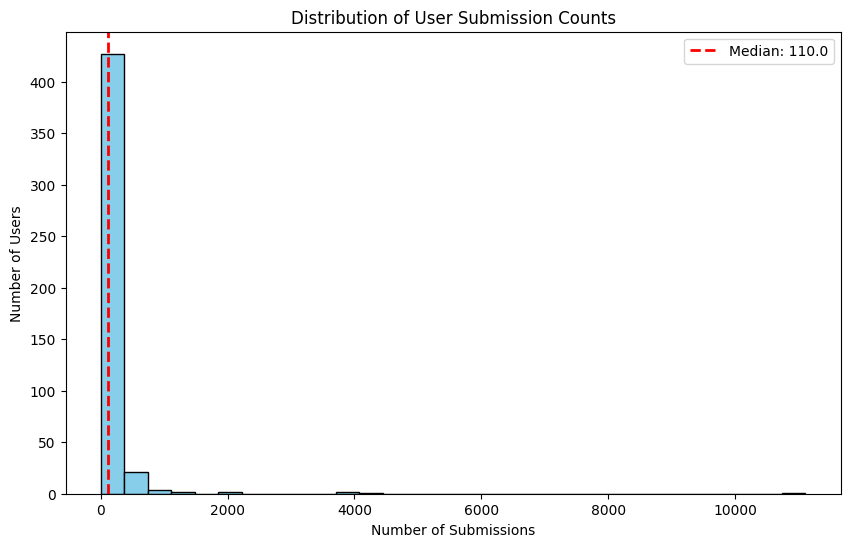

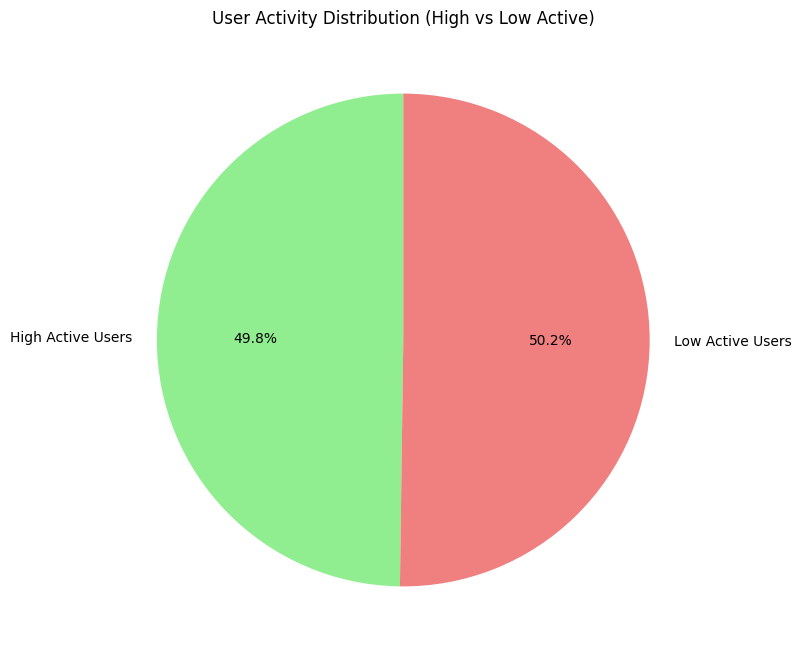

In [13]:
# 转换 event_time 为 datetime 格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 统计每个用户的提交次数
user_submission_counts = df[df['event_type'] == 'CreateEvent'].groupby('user_id').size()

# 输出前五个提交最多的用户
top_5_active_users = user_submission_counts.sort_values(ascending=False).head(5)
print("Top 5 most active users based on submission count:")
print(top_5_active_users)

# 输出最低活跃度的五个用户
bottom_5_active_users = user_submission_counts.sort_values(ascending=True).head(5)
print("Bottom 5 least active users based on submission count:")
print(bottom_5_active_users)

# 计算活跃用户和低活跃用户的分界点
# 使用提交次数的中位数作为分界点
median_submission_count = user_submission_counts.median()

# 将用户分为高活跃和低活跃
high_active_users = user_submission_counts[user_submission_counts > median_submission_count]
low_active_users = user_submission_counts[user_submission_counts <= median_submission_count]

# 输出高活跃用户和低活跃用户的数量
print(f"Number of high-active users: {len(high_active_users)}")
print(f"Number of low-active users: {len(low_active_users)}")

# 绘制用户提交次数的直方图
plt.figure(figsize=(10, 6))
plt.hist(user_submission_counts, bins=30, color='skyblue', edgecolor='black')
plt.axvline(median_submission_count, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_submission_count}')
plt.title('Distribution of User Submission Counts')
plt.xlabel('Number of Submissions')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

# 绘制高活跃用户和低活跃用户的饼图
user_activity_counts = [len(high_active_users), len(low_active_users)]
labels = ['High Active Users', 'Low Active Users']

plt.figure(figsize=(8, 8))
plt.pie(user_activity_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('User Activity Distribution (High vs Low Active)')
plt.show()


## 三、其他维度有趣的洞察（至少2个）

1.影响力与活动的关系分析

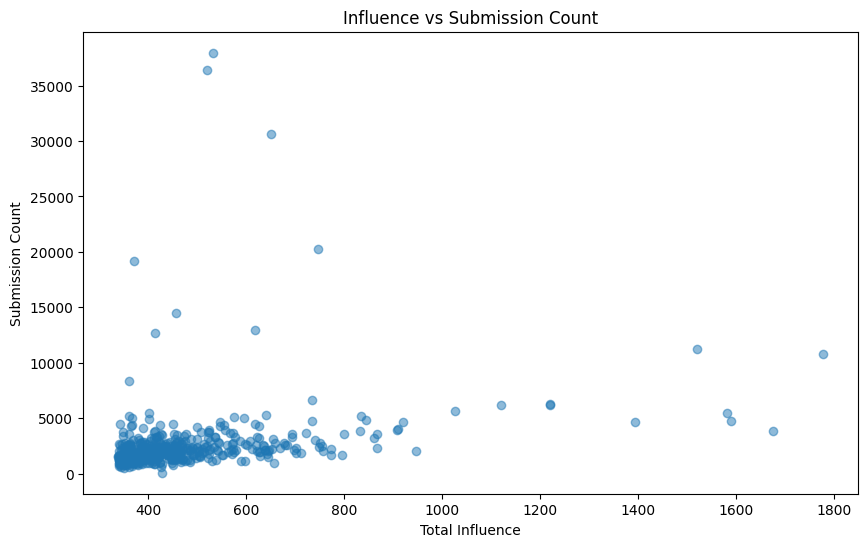

Correlation between total influence and submission count: 0.26


In [14]:
# 计算每个用户的总影响力与提交次数之间的关系
user_influence_activity = df.groupby('user_id').agg({'total_influence': 'mean', 'event_type': 'size'})
user_influence_activity.columns = ['total_influence', 'submission_count']

# 绘制影响力与提交次数的散点图
plt.figure(figsize=(10, 6))
plt.scatter(user_influence_activity['total_influence'], user_influence_activity['submission_count'], alpha=0.5)
plt.title('Influence vs Submission Count')
plt.xlabel('Total Influence')
plt.ylabel('Submission Count')
plt.show()

# 计算影响力与提交次数的相关系数
correlation = user_influence_activity.corr().loc['total_influence', 'submission_count']
print(f"Correlation between total influence and submission count: {correlation:.2f}")

2. 活动模式与时间分布分析

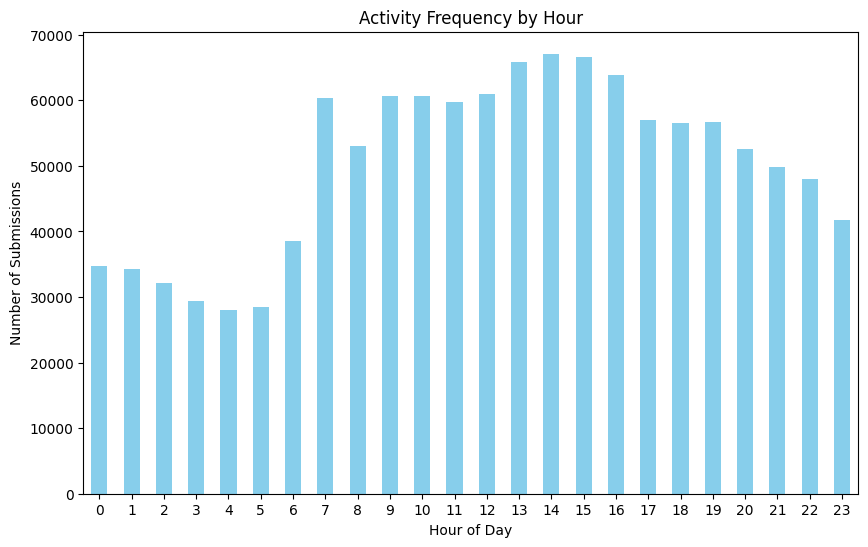

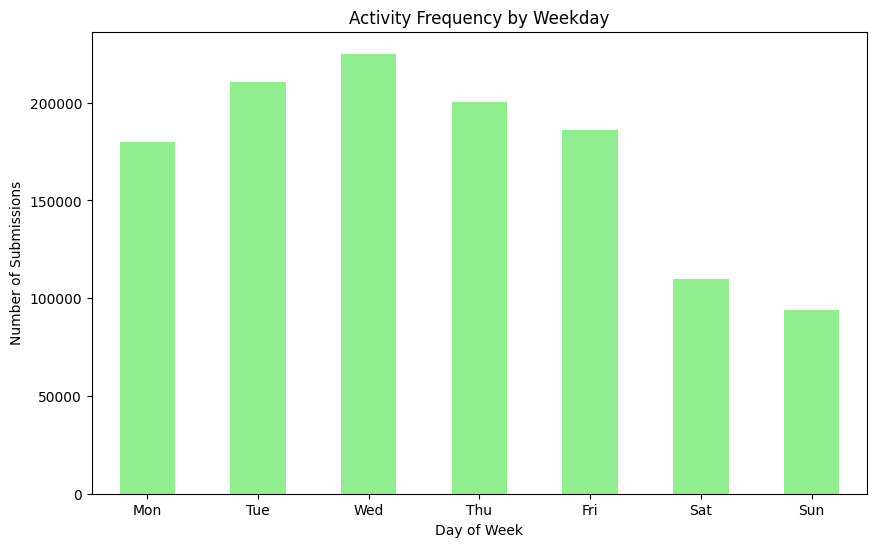

In [15]:
# 提取小时和星期几信息
df['hour'] = df['event_time'].dt.hour
df['weekday'] = df['event_time'].dt.weekday

# 统计各小时段的提交次数
hourly_activity = df.groupby('hour').size()

# 绘制每日小时提交频率
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='bar', color='skyblue')
plt.title('Activity Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=0)
plt.show()

# 统计每个星期几的提交次数
weekday_activity = df.groupby('weekday').size()

# 绘制每周活跃度
plt.figure(figsize=(10, 6))
weekday_activity.plot(kind='bar', color='lightgreen')
plt.title('Activity Frequency by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Submissions')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

3. 地区与活动类型分析

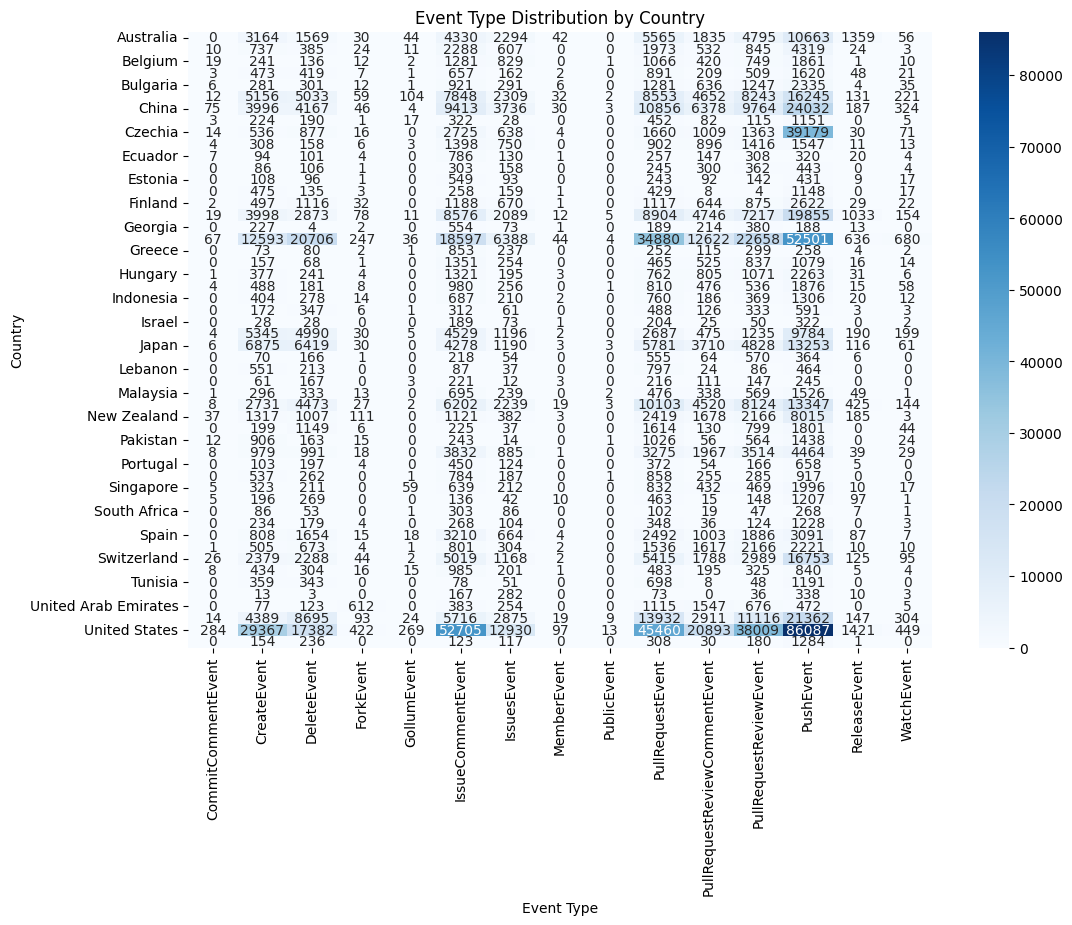

In [16]:
# 统计每个国家的活动类型分布
activity_by_country = df.groupby(['country', 'event_type']).size().unstack(fill_value=0)

# 绘制活动类型分布的热力图
plt.figure(figsize=(12, 8))
sns.heatmap(activity_by_country, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Event Type Distribution by Country')
plt.xlabel('Event Type')
plt.ylabel('Country')
plt.show()